In [1]:
import panel as pn
pn.extension()

import climakitae as ck

In [2]:
app = ck.Application()

Card(collapsible=False, title='Choose Data A...)
    [0] Column
        [0] Row
            [0] Column(width=150)
                [0] StaticText(name='Data type')
                [1] RadioBoxGroup(inline=True, options=OrderedDict([('Gridded', ...]), value='Gridded')
            [1] Column(width=270)
                [0] StaticText(name='Downscaling method')
                [1] CheckBoxGroup(disabled=True, inline=True, name='Downscaling method', options=OrderedDict([('Dynamical',...]), value=['Dynamical'])
            [2] Column(width=400)
                [0] StaticText(style={'color': 'red'})
        [1] Spacer(background='black', height=1)
        [2] Row
            [0] Column(width=380)
                [0] StaticText(name='Variable')
                [1] Select(options=OrderedDict([('Air Tempera...]), value='Air Temperature at 2m')
                [2] StaticText(value="Temperature o...)
                [3] Row
                    [0] Column(width=250)
                        [0] StaticText(name='Historical Data', value='<br>Estimates o...)
                        [1] CheckBoxGroup(name='Scenario historical', options=OrderedDict([('Historical ...]), value=['Historical Climate'])
                        [2] StaticText(name='Future Model Data', value='<br> Shared S...)
                        [3] CheckBoxGroup(name='Scenario ssp', options=OrderedDict([('SSP 2-4.5 -...]))
                        [4] Column(width=220)
                            [0] ParamMethod(method, _pane=Matplotlib)
                            [1] RangeSlider(end=2100, start=1950, step=1, value=(1980, 2015), value_end=2015, value_start=1980)
                    [1] Column(width=150)
                        [0] StaticText(name='Variable Units')
                        [1] RadioBoxGroup(name='Units', options=OrderedDict([('K', ...]), value='K')
                        [2] StaticText(name='Timescale')
                        [3] RadioBoxGroup(options=OrderedDict([('hourly', ...]), value='monthly')
                        [4] StaticText(name='Model Grid-Spacing')
                        [5] RadioBoxGroup(name='Resolution', options=OrderedDict([('3 km', ...]), value='9 km')
                        [6] StaticText(style={'color': 'red'})
            [1] HSpacer(width=10)
            [2] Row
                [0] Column(width=220)
                    [0] ParamMethod(method, _pane=Matplotlib)
                    [1] Select(name='Subset the data by...', options=OrderedDict([('none', ...]), value='none')
                    [2] Select(name='Location selection', options=OrderedDict([('entire doma...]), value='entire domain')
                    [3] RangeSlider(end=67, name='Latitude', start=10, value=(32.5, 42), value_end=42, value_start=32.5)
                    [4] RangeSlider(end=-84.18701, name='Longitude', start=-156.82317, value=(-125.5, -114), value_end=-114, value_start=-125.5)
                    [5] StaticText(value='Compute an area a...)
                    [6] RadioBoxGroup(inline=True, name='Area average', options=OrderedDict([('Yes', ...]), value='No')
                [1] Column(width=270)
                    [0] Spacer(height=10)
                    [1] StaticText(name='Weather station')
                    [2] CheckBoxGroup(options=OrderedDict([("Set data ty...]), value=["Set data type t...])
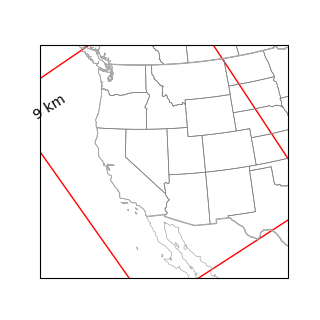
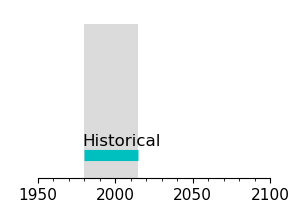

In [3]:
app.select()


In [11]:
data_to_use = app.retrieve()

In [12]:
data_to_use


<xarray.DataArray 'Air Temperature at 2m' (scenario: 1, simulation: 4,
                                           time: 5844, y: 433, x: 179)>
dask.array<add, shape=(1, 4, 5844, 433, 179), dtype=float32, chunksize=(1, 1, 2970, 122, 55), chunktype=numpy.ndarray>
Coordinates:
  * time               (time) datetime64[ns] 2007-01-01 ... 2022-12-31
  * x                  (x) float64 -4.278e+06 -4.275e+06 ... -3.744e+06
  * y                  (y) float64 5.449e+05 5.479e+05 ... 1.838e+06 1.841e+06
    lakemask           (y, x) float32 dask.array<chunksize=(161, 75), meta=np.ndarray>
    landmask           (y, x) float32 dask.array<chunksize=(161, 75), meta=np.ndarray>
    lat                (y, x) float32 dask.array<chunksize=(161, 75), meta=np.ndarray>
    lon                (y, x) float32 dask.array<chunksize=(161, 75), meta=np.ndarray>
  * simulation         (simulation) <U13 'cesm2' 'cnrm-esm2-1' ... 'fgoals-g3'
    Lambert_Conformal  int64 0
  * scenario           (scenario) <U43 'Historical + SSP 3-7.0 -- Business as...
Attributes:
    institution:           UCLA Center for Climate Science
    source:                https://dept.atmos.ucla.edu/alexhall/downscaling-c...
    location_subset:       CA
    resolution:            3 km
    frequency:             daily
    grid_mapping:          Lambert_Conformal
    variable_id:           t2
    extended_description:  Temperature of the air 2m above Earth's surface. T...
    units:                 degF
    data_type:             Gridded

In [7]:
data_to_use = app.load(data_to_use)

Reading 14.19 MB of data into memory... complete!


In [8]:
app.view(data_to_use)

:DynamicMap   [scenario,time,simulation]
   :Image   [x,y]   (Precipitation (total))

In [10]:
app.export_as()

Row
    [0] Column(margin=5, name='_FileTypeSelector', width=300)
        [0] StaticText(value='<b>_FileTypeSelector</b>'...)
        [1] Select(name='Output file format', options=OrderedDict([('Pick a file...]), value='Pick a file format')

In [11]:
app.export_dataset(data_to_use, 'Test_1_Year')

Alright, exporting specified data to NetCDF.
Saved! You can find your file(s) in the panel to the left and download to your local machine from there.
